# **POSTTEST 5**

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, mean_absolute_error, mean_squared_error, r2_score

In [94]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## **A. Supervised Learning**

**Support Vector Classifier dari SVM**

digunakan pada label kategorikal

Mengambil 2 fitur untuk Binary Classification

Pisahkan fitur (X) dan label (y)

In [105]:
X = df[['age', 'duration']]
y = df['y']

Memetakan kelas target ke label biner

In [106]:
y = np.where(y == 'yes', 1, -1)

Membagi data (split) ke train set dan test set

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Membuat objek classifier SVM

In [112]:
svm = SVC(kernel="rbf")

Melatih classifier dengan data train

In [113]:
svm.fit(X_train, y_train)

SVC()

Melakukan prediksi data test dengan model

In [114]:
y_pred = svm.predict(X_test)

Menyimpan nilai support vectors dan indeksnya

In [115]:
support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train, support_vectors).all(axis=1))

Plotting menggunakan scatter dari Seaborn dan menampilkan titik titik support vector, lalu membuat garis decision boundary, meshgrid untuk evaluasi model, grafik decision boundary dan garis margin serta menambahkan label dan legenda

D:\Kecerdasan Buatan\venv_C2-21\feby_137\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


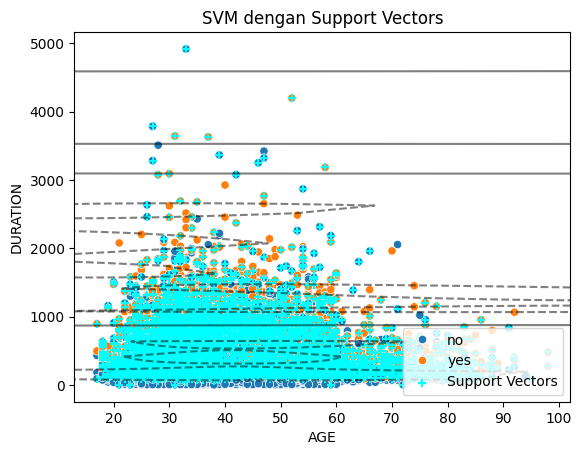

In [129]:
sns.scatterplot(x='age', y='duration', hue='y', data=df)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=40, color='cyan', marker='+', label='Support Vectors')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), np.linspace(ylim[0], ylim[1]))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
linestyles=['--', '-', '--'])
plt.xlabel('AGE')
plt.ylabel('DURATION')
plt.legend(loc='lower right')
plt.title('SVM dengan Support Vectors')
plt.show()

Melihat 4 nilai metriks dengan menggunakan library dari Scikit-Learn yaitu Classification Report.

In [130]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.91      0.99      0.94     10968
           1       0.62      0.18      0.28      1389

    accuracy                           0.90     12357
   macro avg       0.76      0.58      0.61     12357
weighted avg       0.87      0.90      0.87     12357



melakukan prediksi data test dengan model dan menampilkan hasil

In [131]:
y_pred = svm.predict(X_test)
print("MAE       :", mean_absolute_error(y_test, y_pred))
print("MSE       :", mean_squared_error(y_test, y_pred))
print("RMSE      :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared :", r2_score(y_test, y_pred))

MAE       : 0.20862668932588815
MSE       : 0.4172533786517763
RMSE      : 0.6459515296458213
R-Squared : -0.04552946486381737


## **Unsupervised Learning**

### **K-Means**

Visualisasi Classification Report

Menggunakan fitur X dan menentukan banyaknya kelompok

In [126]:
X = df[['age', 'duration']]
K = 2

Inisialisasi K-Means dan melatih model K-Means berdasarkan data X

In [127]:
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

Membuat label kelompok dari model dan tambah kolom prediksi serta titik pusat kelompok dari model

In [128]:
cluster_labels = kmeans.labels_
df["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_

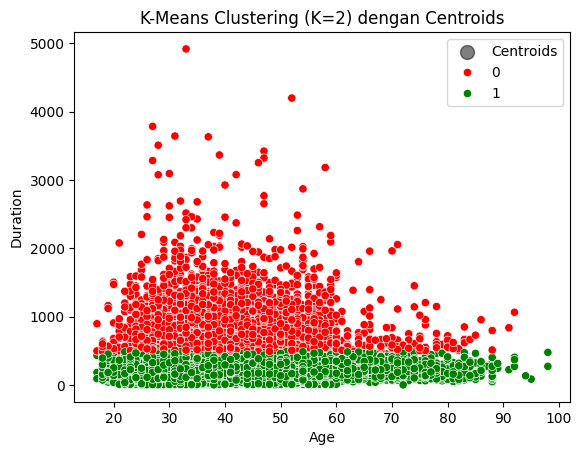

In [132]:
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='black', s=100, label='Centroids')
sns.scatterplot(data=df, x="age", y="duration", hue="cluster", palette=["red", "green"])
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("Age")
plt.ylabel("Duration")
plt.legend()
plt.show()